# Covid vaccine
* Playing with the Phase 3 trial data from Pfizer/BioNTech Covid-19 vaccine
* Derived approximate case numbers based on the publicly available data (Pfizer website)
* Calculate a confidence interval around the first reported '90 % efficiacy'

In [2]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [3]:
# approximate phase 3 trial case numbers 
tot = 43538 # total number of trial participants
vacc_pos = 9 # number of vaccinated participants with a following covid infection
plac_pos = 85 # number of placebo participants with a following covid infection

vacc_neg = int(tot/2-vacc_pos) # number of vaccinated participants without a covid infection
plac_neg = int(tot/2-plac_pos) # number of placebo participants without a covid infection


21760 21684


In [6]:
def efficacy(vacc_pos, plac_pos):
    """returns efficiacy in %'"""
    return (plac_pos - vacc_pos)/plac_pos*100

In [18]:
# generate data (array with 0 and 1, 0 for no infection, 1 for infection)
D_V = np.concatenate([np.zeros(vacc_neg), np.ones(vacc_pos)]) # vaccinated participants
D_P = np.concatenate([np.zeros(plac_neg), np.ones(plac_pos)]) # placebo participants

In [19]:
# resample with replacement 
n = 1000
vacc_pos_R = []
plac_pos_R = []
for i in range(n):
    D_VR = resample(D_V, replace = True)
    D_PR = resample(D_P, replace = True)

    vacc_pos_R.append(np.sum(D_VR)) # counting the positive cases in the vaccinated group in the resampled data
    plac_pos_R.append(np.sum(D_PR)) # counting the positive cases in the placebo group in the resampled data

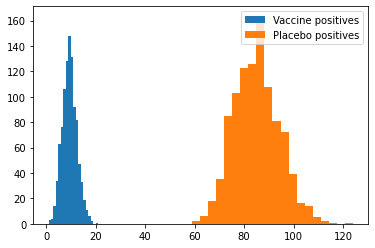

In [24]:
# plotting the distribution of covid cases in vaccine and placebo group with 1000x resampling
plt.hist(vacc_pos_R, 20, label = 'Vaccine positives')
plt.hist(plac_pos_R, 20, label = 'Placebo positives')
plt.legend()

Text(0.5, 0, 'Efficacy (%)')

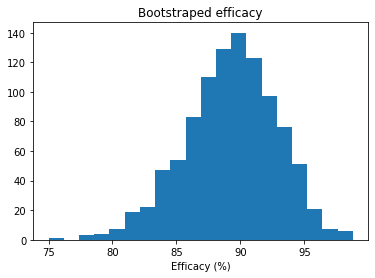

In [32]:
# plotting the resulting distribution of vaccine efficacy 
eff_R = efficacy(np.array(vacc_pos_R), np.array(plac_pos_R))
plt.hist(eff_R, 20)
plt.title('Bootstraped efficacy')
plt.xlabel('Efficacy (%)')

In [38]:
# rough (not correct for skewed data like this) way to estimate the confidence interval: quantiles of the distribution 
print(np.quantile(eff_R, 0.025))
print(np.quantile(eff_R, 0.975))
print(np.mean(eff_R))

81.6873610081542
95.65560640732265
89.24209015553849
